<a href="https://colab.research.google.com/github/manuel1729/Simulaci-n-1/blob/main/Metodo_Aceptaci%C3%B3n_Triangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gómez Cruz Manuel

**MÉTODO DE ACEPTACIÓN Y RECHAZO**

Es una técnica utilizada para generar números aleatorios a partir de una distribución de probabilidad arbitraria f(x), especialmente cuando no se puede muestrear directamente de ella.

Pasos:

1) Generar dos números aleatorios $R_1$ y $R_2$.

2) Determinar x: ** $x=a+ (b-a)\cdot R_1$ **

3) Evaluar en f en x

4) Si $\quad R_2\leq \frac{f(x)}{M} \quad$ aceptar x

Otro caso: Rechazar


**Distribución triangular**

$f(x)=\left\{\begin{array}{lc} \frac{2}{(c-a)(b-a)}(x-a) & a\leq x \leq b\\ \frac{2}{(c-a)(b-c)}(x-c) & b\leq x\leq c \end{array}\right.$

Tomando a=1 b=3 c=5

$f(x)=\left\{\begin{array}{lc} \frac{1}{4}(x-1) & 1\leq x \leq 3\\ -\frac{1}{4}(x-5) & 3\leq x\leq 5 \end{array}\right.$

In [2]:
#Importamos librerías
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#Valores de nuestra función
a=1
b=3
c=5
M=2/(c-a)

In [11]:
#Función arbitraria de función tringular
def f(x):
    if a<=x<=b:
        return 2*(x-a)/((b-a)*(c-a))
    elif b<x<=c:
        return 2*(x-c)/((b-c)*(c-a))

In [15]:
#Implementamos n veces el método de aceptación y guardamos en lista
def aceptacion(n):
  lista=[]
  for _ in range(n):
    R1=rd.random()
    R2=rd.random()
    x=a+(c-a)*R1 #Cambiamos b por c profe porque es el extremo derecho del intervalo
    if R2<=f(x)/M:
      lista.append(x)
  return lista

In [16]:
#Prueba de n=50000
H=aceptacion(50000)

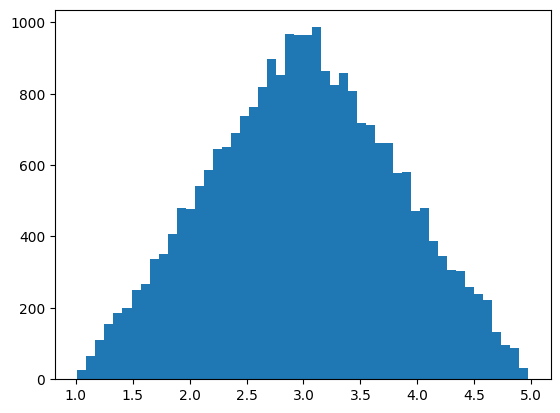

In [17]:
#Histograma de h
plt.hist(H,bins=50)
plt.show()

In [18]:
print("Media aprox: ",np.mean(H))
print("Varianza aprox: ", np.var(H))
print("Desviacion estandar aprox: ", np.std(H))

Media aprox:  3.000949830300854
Varianza aprox:  0.6581841310715446
Desviacion estandar aprox:  0.8112854806241417


In [19]:
#Calculo de media, varianza y deviación analítica
#Librería para integrar
from scipy.integrate import quad

In [20]:
#Distribución triangular
def f(x, a, b, c):
    if a<=x<=b:
        return 2*(x-a)/((b-a)*(c-a))
    elif b<x<=c:
        return 2*(x-c)/((b-c)*(c-a))

In [21]:
def media(f, a, b, c):
    media_val, _ = quad(lambda x: x * f(x, a, b, c), a, c)
    return media_val

def varianza(f, a, b, c):
    ex2, _ = quad(lambda x: x**2 * f(x, a, b, c), a, c)
    var_val = ex2 - media(f, a, b, c)**2
    return var_val

In [22]:
media_exac=media(f, a, b, c)
varianza_exac=varianza(f, a, b, c)

print("Media exacta: ",media_exac)
print("Varianza exacta: ", varianza_exac)
print("Desviación exacta: ",varianza_exac**(1/2))

Media exacta:  3.0
Varianza exacta:  0.6666666666666661
Desviación exacta:  0.8164965809277257
